In [12]:
import mytry
import matplotlib.pyplot as plt
import os
from utils import evaluate as my_eval
from utils import model_MLP as my_MLP

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [13]:
EPOCH = 1000
TARGET_CATEGORY = '편의점'

filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"
savepath = os.path.join('./log', TARGET_CATEGORY)

In [52]:
filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"

# Raw
x_train, y_train, x_test, y_test, scaler_raw = mytry.get_traintest(
    filepath=filepath,
    pred_category=TARGET_CATEGORY, 
    y_next_quarter=True, 
    random_split=True, 
    norm=None, 
    pca=False
)

# MinMMax
scaler_minmax = MinMaxScaler()
x_train_minmax, x_test_minmax = mytry.__get_normed(x_train, x_test, scaler_minmax)
y_train_minmax, y_test_minmax = mytry.__get_normed(y_train, y_test, scaler_minmax)

# Standard
scaler_std = StandardScaler()
x_train_std, x_test_std = mytry.__get_normed(x_train, x_test, scaler_std)
y_train_std, y_test_std = mytry.__get_normed(y_train, y_test, scaler_std)

# PCA
scaler_pca = StandardScaler()
pca = PCA()
x_train_pca, x_test_pca = mytry.__get_normed(x_train, x_test, scaler_pca)
y_train_pca, y_test_pca = mytry.__get_normed(y_train, y_test, scaler_pca)
x_train_pca, x_test_pca = mytry.___get_PCA(x_train_pca, x_test_pca, pca)

[train] 2017_1 : (1147, 30), accumulate : (1147, 30)
[train] 2017_2 : (1147, 30), accumulate : (2294, 30)
[train] 2017_3 : (1147, 30), accumulate : (3441, 30)
[train] 2017_4 : (1147, 30), accumulate : (4588, 30)
[train] 2018_1 : (1147, 30), accumulate : (5735, 30)
[train] 2018_2 : (1147, 30), accumulate : (6882, 30)
[train] 2018_3 : (1147, 30), accumulate : (8029, 30)
[test] 2019_1 : (1147, 30), accumulate : (1147, 30)
[test] 2019_2 : (1147, 30), accumulate : (2294, 30)
[test] 2019_3 : (1147, 30), accumulate : (3441, 30)
[test] 2018_4 : (1147, 30), accumulate : (4588, 30)
x_header ['남성연령대_10_유동인_수', '남성연령대_20_유동인_수', '남성연령대_30_유동인_수', '남성연령대_40_유동인_수', '남성연령대_50_유동인_수', '남성연령대_60_유동인_수', '여성연령대_10_유동인_수', '여성연령대_20_유동인_수', '여성연령대_30_유동인_수', '여성연령대_40_유동인_수', '여성연령대_50_유동인_수', '여성연령대_60_유동인_수'] y_header ['다음분기_매출_금액']
random split
pca ratios [0.78 0.11 0.07 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.  ]
pca ratios [0.78 0.11 0.07 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.  ]
pca top-3


In [53]:
dataset_raw =    [x_train, y_train, x_test, y_test]
dataset_minmax = [x_train_minmax, y_train_minmax, x_test_minmax, y_test_minmax]
dataset_std =    [x_train_std, y_train_std, x_test_std, y_test_std]
dataset_pca =    [x_train_pca, y_train_pca, x_test_pca, y_test_pca]

# Model training

## LGBM

In [54]:
model_LGBM_raw = mytry.main(
    modelname='LGBM_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw
)

------- evaluate LGBM with raw -------
RMSE : 773664181.644976
R2 : 0.684330
----------------------------
[391304.56432208] 3786
평균 오차 103%
최대 오차 2614%
최소 오차 0%


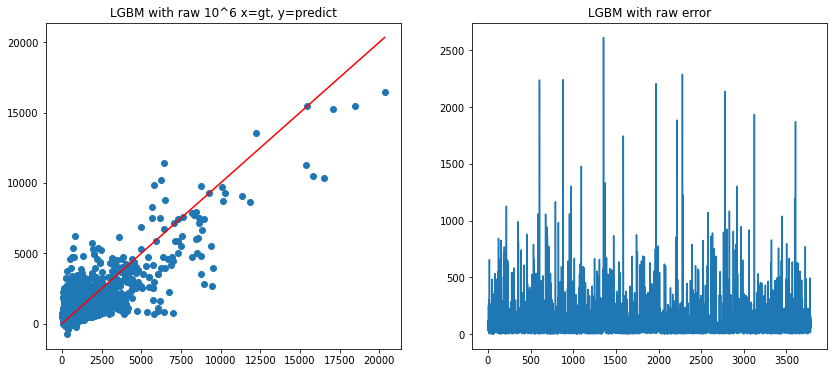

In [55]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, model_name='LGBM with raw', savepath=savepath)

In [56]:
model_LGBM_minmax = mytry.main(
    modelname='LGBM_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax
)

In [57]:
model_LGBM_std = mytry.main(
    modelname='LGBM_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std
)

In [58]:
model_LGBM_pca = mytry.main(
    modelname='LGBM_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca
)

## 4-MLP [12, 6, 1]

In [59]:
model_4MLP_raw, hist_4MLP_raw = mytry.main(
    modelname='4-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=2,
    epoch=EPOCH
)

...................../log/편의점/4-MLP_raw-epoch:0999-val_mse:929037366411132928.0000.hdf5 saved


In [60]:
model_4MLP_minmax, hist_4MLP_minmax = mytry.main(
    modelname='4-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=2,
    epoch=EPOCH
)

.
Epoch 00012: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 1e-06.
..................../log/편의점/4-MLP_minmax-epoch:0999-val_mse:0.0009.hdf5 saved


In [61]:
model_4MLP_std, hist_4MLP_std = mytry.main(
    modelname='4-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=2,
    epoch=EPOCH
)

...
Epoch 00146: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00166: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00171: ReduceLROnPlateau reducing learning rate to 1e-06.
................./log/편의점/4-MLP_std-epoch:0999-val_mse:0.3201.hdf5 saved


In [62]:
model_4MLP_pca, hist_4MLP_pca = mytry.main(
    modelname='4-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=2,
    epoch=EPOCH
)

..............
Epoch 00666: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00671: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
./log/편의점/4-MLP_pca-epoch:0670-val_mse:0.3793.hdf5 saved


## 5-MLP [24, 12, 6, 1]

In [63]:
model_5MLP_raw, hist_5MLP_raw = mytry.main(
    modelname='5-MLP_raw',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_raw,
    scaler = scaler_raw,
    n_hidden=3,
    epoch = EPOCH
)

..............
Epoch 00697: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
......./log/편의점/5-MLP_raw-epoch:0999-val_mse:888343066677608448.0000.hdf5 saved


In [64]:
model_5MLP_minmax, hist_5MLP_minmax = mytry.main(
    modelname='5-MLP_minmax',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_minmax,
    scaler = scaler_minmax,
    n_hidden=3,
    epoch = EPOCH
)

.
Epoch 00009: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00014: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00019: ReduceLROnPlateau reducing learning rate to 1e-06.
..................../log/편의점/5-MLP_minmax-epoch:0999-val_mse:0.0008.hdf5 saved


In [65]:
model_5MLP_std, hist_5MLP_std = mytry.main(
    modelname='5-MLP_std',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_std,
    scaler = scaler_std,
    n_hidden=3,
    epoch = EPOCH
)

..
Epoch 00100: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
.
Epoch 00106: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.

Epoch 00113: ReduceLROnPlateau reducing learning rate to 1e-06.
............/log/편의점/5-MLP_std-epoch:0698-val_mse:0.2919.hdf5 saved


In [66]:
model_5MLP_pca, hist_5MLP_pca = mytry.main(
    modelname='5-MLP_pca',
    dataset_name = TARGET_CATEGORY,
    datasets = dataset_pca,
    scaler = scaler_pca,
    n_hidden=3,
    epoch = EPOCH
)

..
Epoch 00066: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 00071: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
./log/편의점/5-MLP_pca-epoch:0070-val_mse:0.3403.hdf5 saved


# Evaluate

## LGBM

------- evaluate LGBM with raw -------
RMSE : 773664181.644976
R2 : 0.684330
----------------------------
[391304.56432208] 3786
평균 오차 103%
최대 오차 2614%
최소 오차 0%


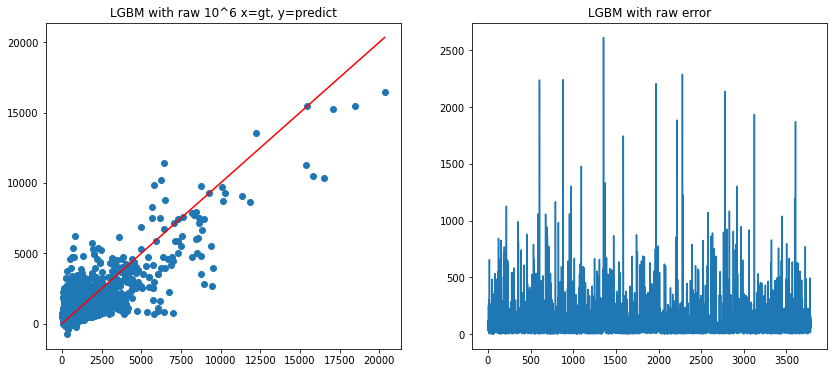

In [67]:
errs_LGBM_raw = my_eval.eval_regression(y_test, model_LGBM_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='LGBM with raw', savepath=savepath)

------- evaluate LGBM with minmax norm -------
RMSE : 765209537.014335
R2 : 0.691192
----------------------------
[387696.52496009] 3786
평균 오차 102%
최대 오차 2585%
최소 오차 0%


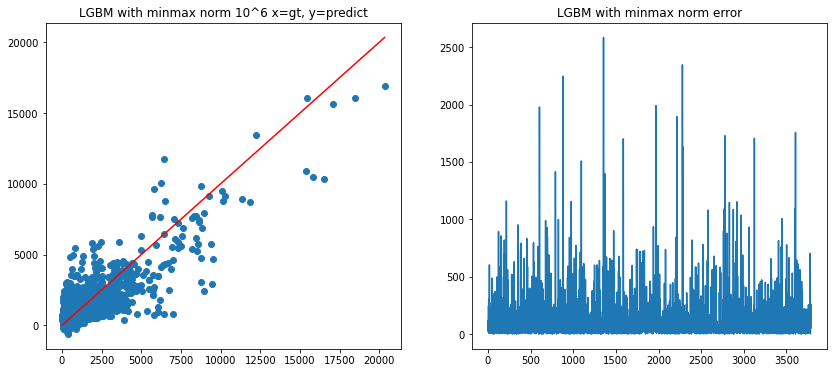

In [68]:
errs_LGBM_minmax = my_eval.eval_regression(y_test_minmax, model_LGBM_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='LGBM with minmax norm', savepath=savepath)

------- evaluate LGBM with std norm -------
RMSE : 765602522.776740
R2 : 0.690874
----------------------------
[385816.00260763] 3786
평균 오차 102%
최대 오차 2679%
최소 오차 0%


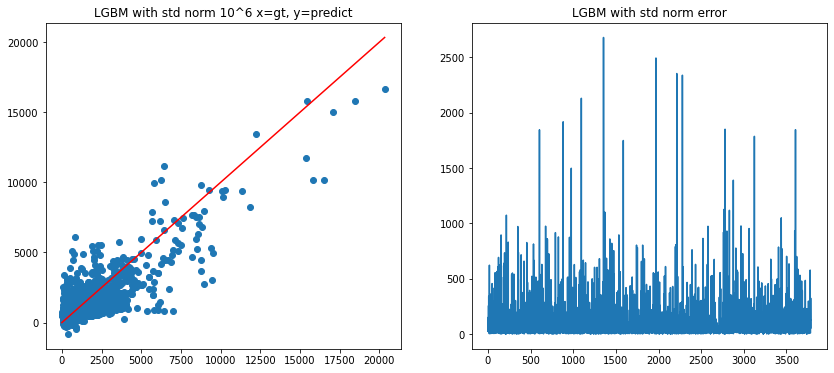

In [69]:
errs_LGBM_std = my_eval.eval_regression(y_test_std, model_LGBM_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='LGBM with std norm', savepath=savepath)

------- evaluate LGBM with PCA -------
RMSE : 874890111.475026
R2 : 0.596322
----------------------------
[396064.18615769] 3786
평균 오차 105%
최대 오차 4187%
최소 오차 0%


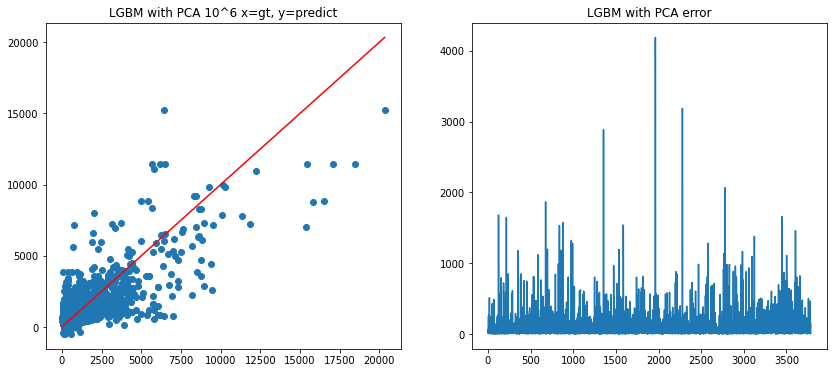

In [70]:
errs_LGBM_pca = my_eval.eval_regression(y_test_pca, model_LGBM_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='LGBM with PCA', savepath=savepath)

## 4-MLP

------- evaluate 4-MLP with raw -------
RMSE : 963865884.836867
R2 : 0.510039
----------------------------
[305336.16099427] 3786
평균 오차 81%
최대 오차 2539%
최소 오차 0%


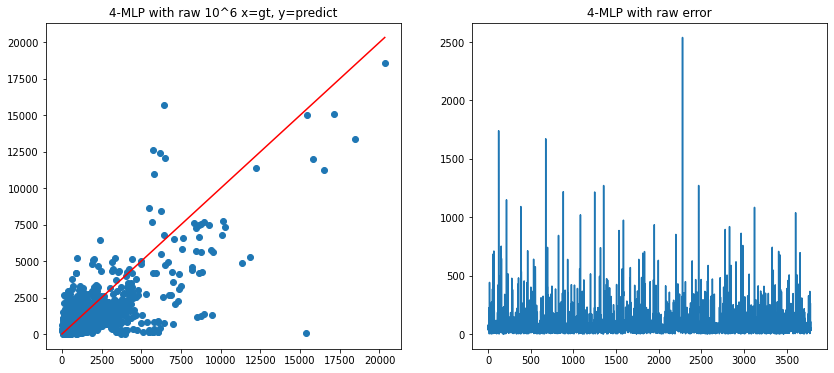

In [71]:
errs_4MLP_raw = my_eval.eval_regression(y_test, model_4MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='4-MLP with raw', savepath=savepath)

------- evaluate 4-MLP with minmax norm -------
RMSE : 911885023.700017
R2 : 0.561461
----------------------------
[404993.87093607] 3786
평균 오차 107%
최대 오차 3284%
최소 오차 0%


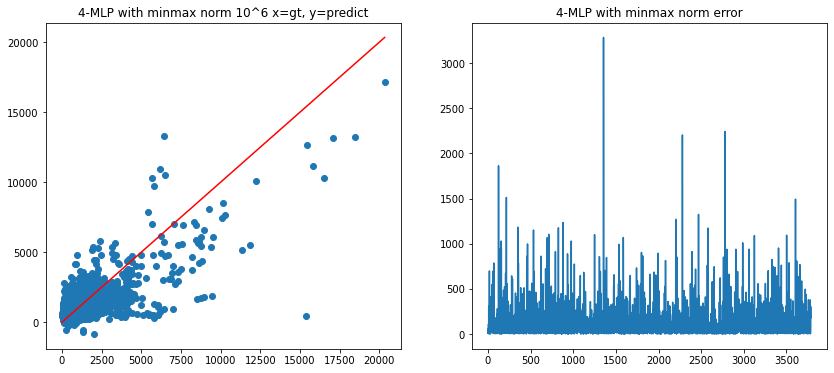

In [72]:
errs_4MLP_minmax = my_eval.eval_regression(y_test_minmax, model_4MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='4-MLP with minmax norm', savepath=savepath)

------- evaluate 4-MLP with std -------
RMSE : 865517252.524817
R2 : 0.604925
----------------------------
[410452.708176] 3786
평균 오차 108%
최대 오차 3136%
최소 오차 0%


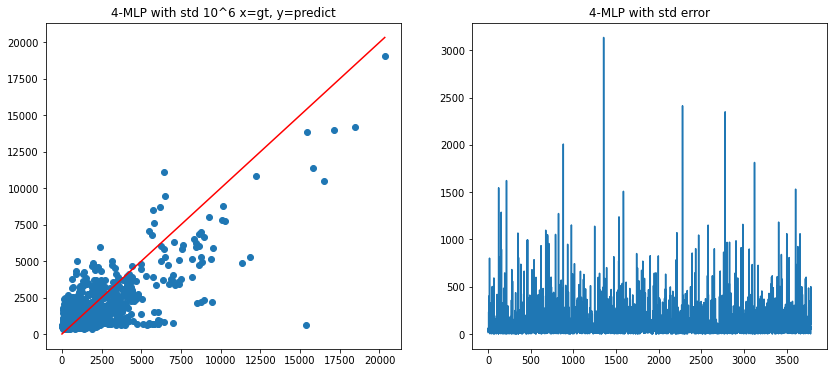

In [73]:
errs_4MLP_std = my_eval.eval_regression(y_test_std, model_4MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='4-MLP with std', savepath=savepath)

------- evaluate 4-MLP with PCA -------
RMSE : 942110808.644574
R2 : 0.531907
----------------------------
[389088.55168305] 3786
평균 오차 103%
최대 오차 2547%
최소 오차 0%


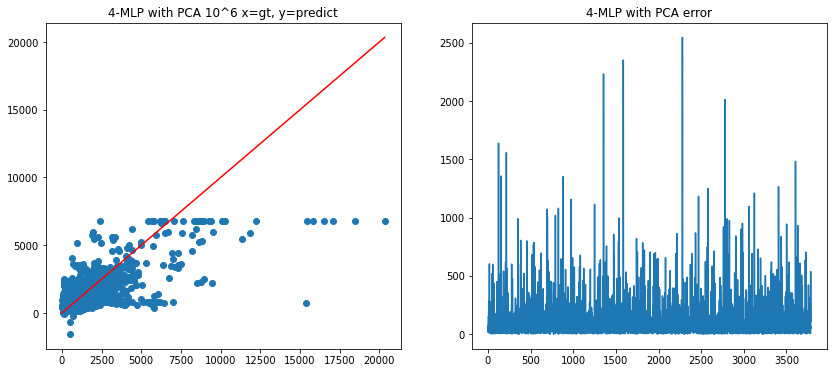

In [74]:
errs_4MLP_pca = my_eval.eval_regression(y_test_pca, model_4MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='4-MLP with PCA', savepath=savepath)

# 5-MLP

------- evaluate 5-MLP with raw -------
RMSE : 942519439.741005
R2 : 0.531501
----------------------------
[296590.61192264] 3786
평균 오차 78%
최대 오차 2122%
최소 오차 0%


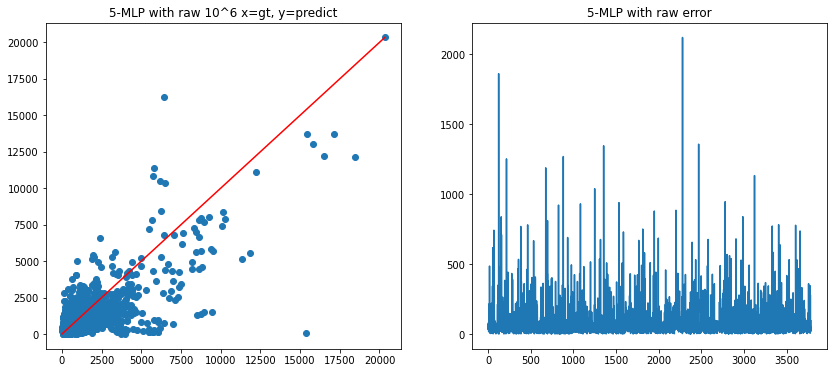

In [75]:
errs_5MLP_raw = my_eval.eval_regression(y_test, model_5MLP_raw.predict(x_test), scaler=scaler_raw, 
                                        model_name='5-MLP with raw', savepath=savepath)

------- evaluate 5-MLP with minmax norm -------
RMSE : 872210608.134290
R2 : 0.598791
----------------------------
[410577.5122055] 3786
평균 오차 108%
최대 오차 2750%
최소 오차 0%


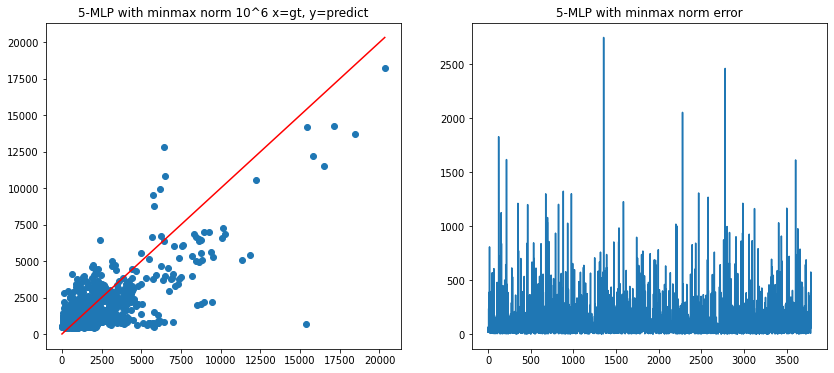

In [88]:
errs_5MLP_minmax = my_eval.eval_regression(y_test_minmax, model_5MLP_minmax.predict(x_test_minmax), scaler=scaler_minmax, 
                                           model_name='5-MLP with minmax norm', savepath=savepath)

------- evaluate 5-MLP with std norm -------
RMSE : 826459549.584467
R2 : 0.639777
----------------------------
[406944.47674197] 3786
평균 오차 107%
최대 오차 2950%
최소 오차 0%


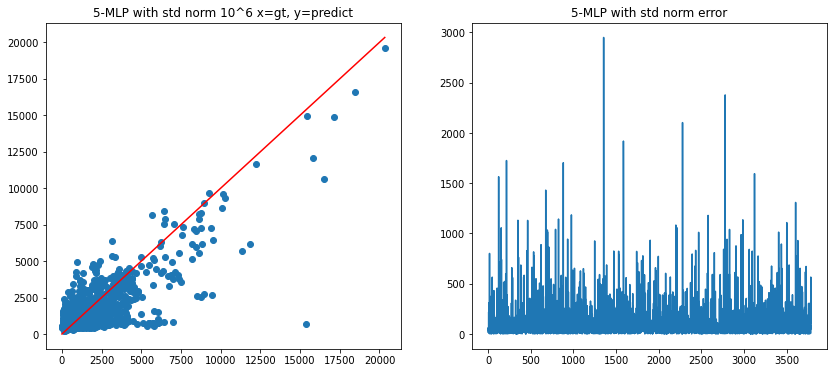

In [77]:
errs_5MLP_std = my_eval.eval_regression(y_test_std, model_5MLP_std.predict(x_test_std), scaler=scaler_std, 
                                        model_name='5-MLP with std norm', savepath=savepath)

------- evaluate 5-MLP with PCA -------
RMSE : 891547706.314762
R2 : 0.580804
----------------------------
[408615.90857368] 3786
평균 오차 108%
최대 오차 2605%
최소 오차 0%


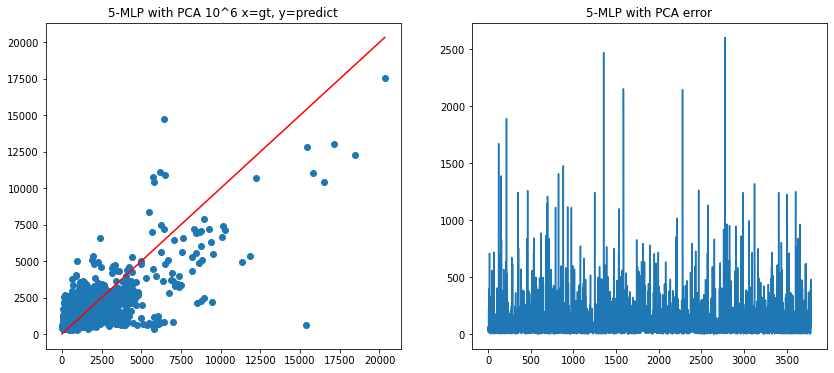

In [78]:
errs_5MLP_pca = my_eval.eval_regression(y_test_pca, model_5MLP_pca.predict(x_test_pca), scaler=scaler_pca, 
                                        model_name='5-MLP with PCA', savepath=savepath)

# Appendix - MLP training history

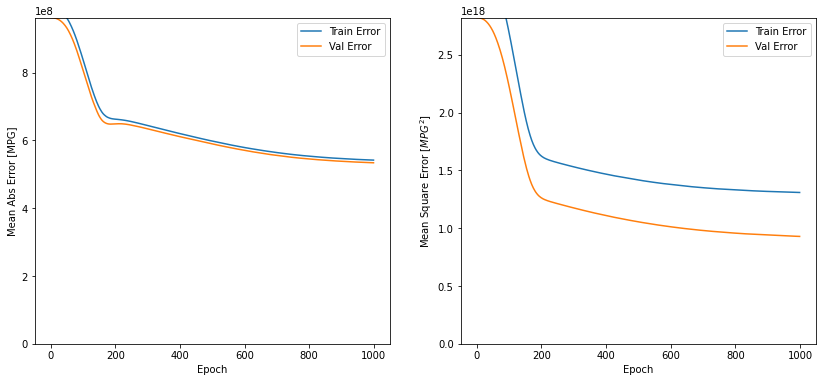

In [79]:
my_MLP.plot_history(hist_4MLP_raw)

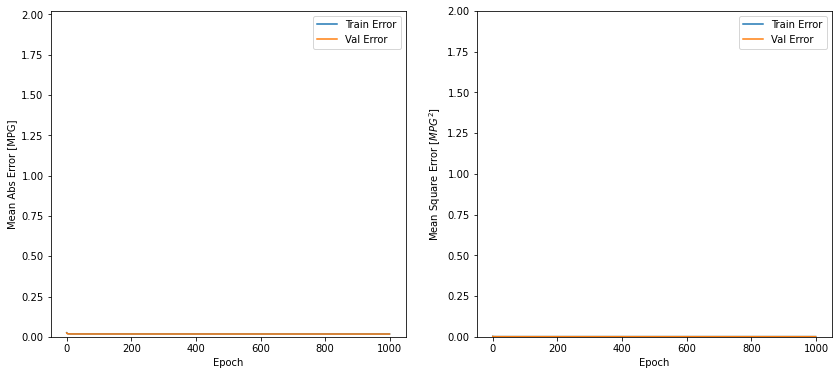

In [80]:
my_MLP.plot_history(hist_4MLP_minmax)

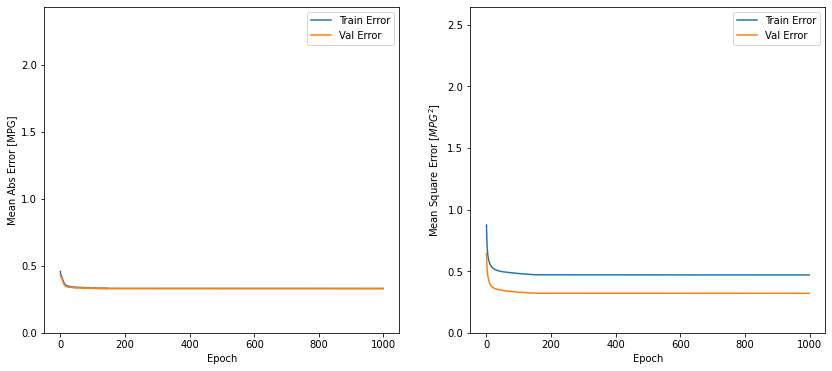

In [81]:
my_MLP.plot_history(hist_4MLP_std)

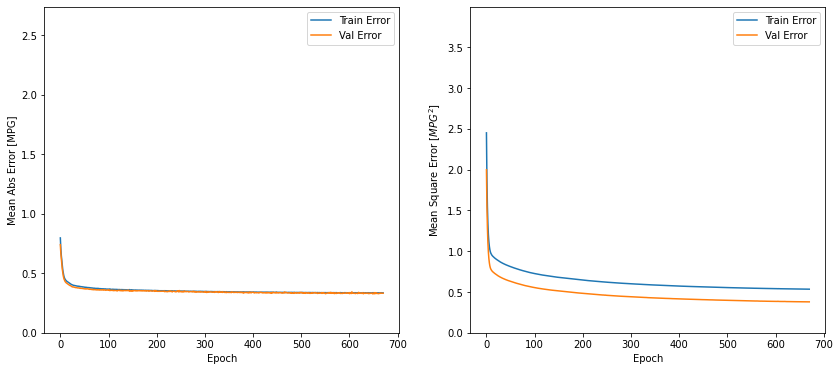

In [82]:
my_MLP.plot_history(hist_4MLP_pca)

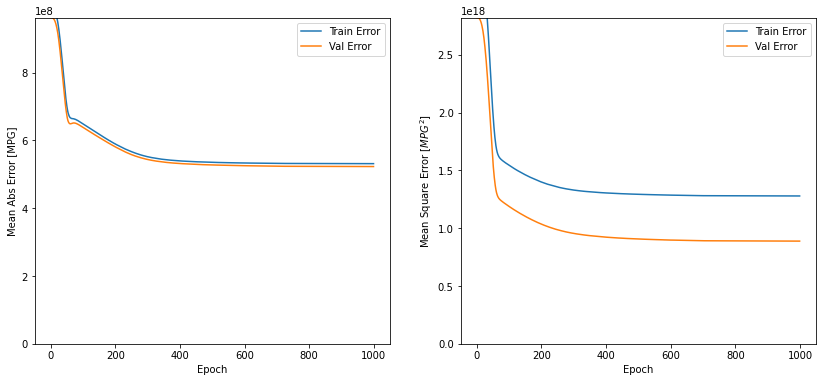

In [83]:
my_MLP.plot_history(hist_5MLP_raw)

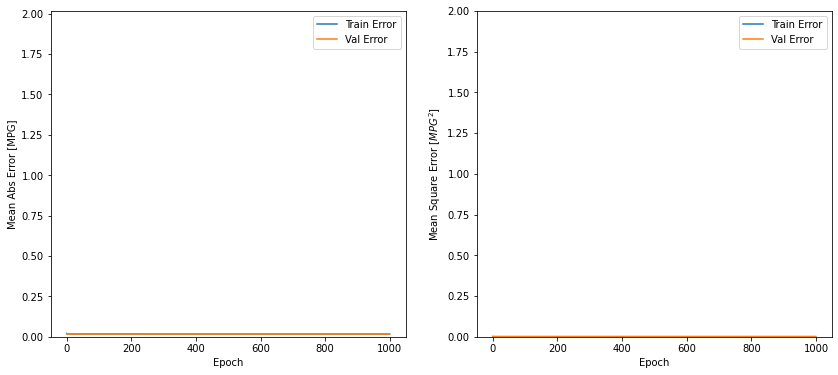

In [84]:
my_MLP.plot_history(hist_5MLP_minmax)

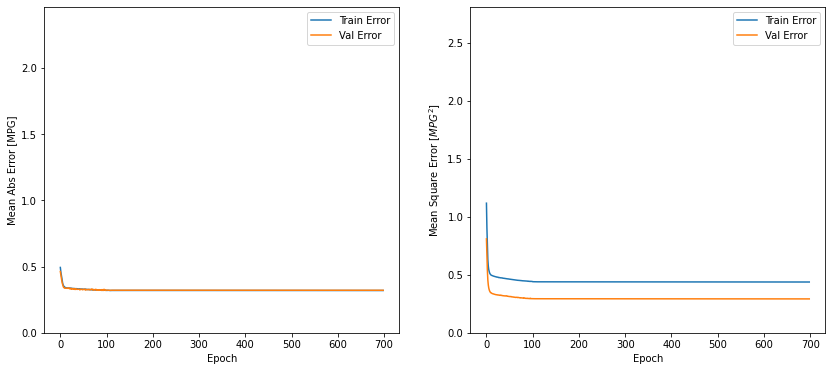

In [85]:
my_MLP.plot_history(hist_5MLP_std)

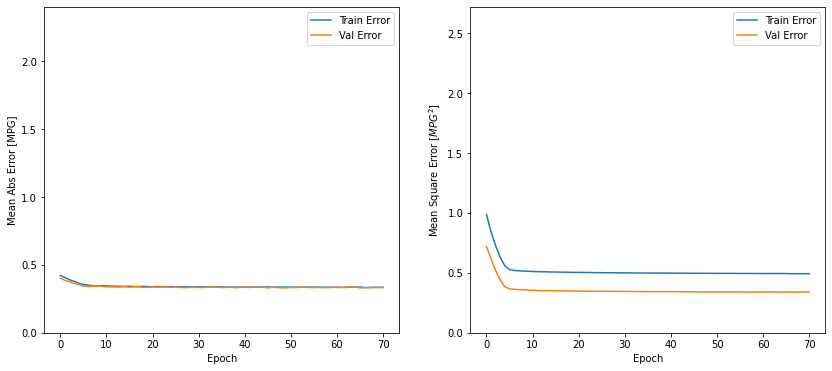

In [86]:
my_MLP.plot_history(hist_5MLP_pca)